In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection, linear_model, metrics


In [6]:
# Importing data
data = pd.read_csv('train.csv')

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


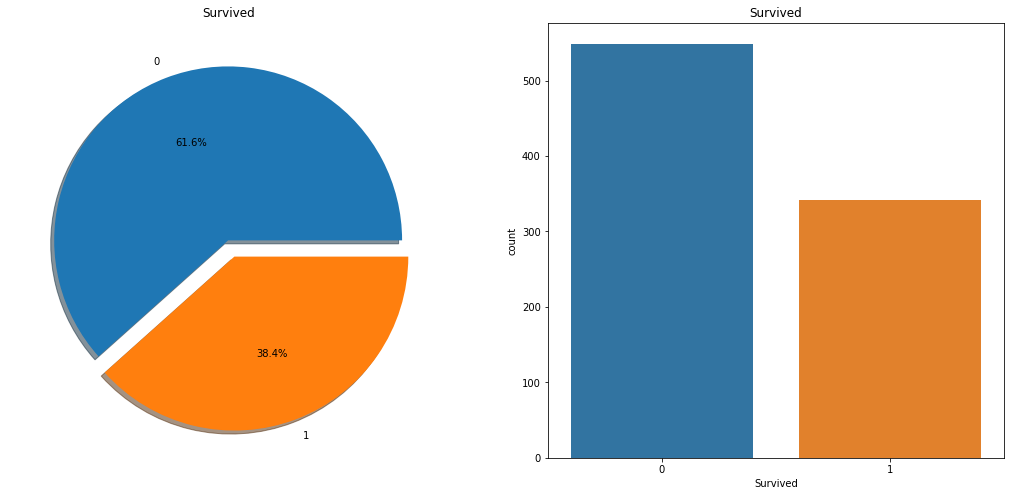

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [8]:
# Selecting the target column and the feature matrix
y = data['Survived']
X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
# Checking the types of the columns and if they contain missing values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [33]:
# Separating the feature matrix according to numeric and categorical features
num_feat = X.select_dtypes('number').columns.values
cat_feat = X.select_dtypes('object').columns.values
X_num = X[num_feat]
X_cat = X[cat_feat]

In [12]:
# Encoding the categorical features using one-hot encoding
X_cat = pd.get_dummies(X_cat)
X_cat.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [13]:
# Combining processed numeric and categorical features in one feature matrix
X = pd.concat([X_num, X_cat], axis=1)
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.826913,-0.530005,0.432550,-0.473408,-0.502163,0,1,0,0,1
1,-1.565228,0.571430,0.432550,-0.473408,0.786404,1,0,1,0,0
2,0.826913,-0.254646,-0.474279,-0.473408,-0.488580,1,0,0,0,1
3,-1.565228,0.364911,0.432550,-0.473408,0.420494,1,0,0,0,1
4,0.826913,0.364911,-0.474279,-0.473408,-0.486064,0,1,0,0,1


In [14]:
# Splitting the final dataset into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)


In [15]:
# Fitting the model and printing the accuracy score
model = linear_model.SGDClassifier(loss='log', max_iter=2000, random_state=0) # Random state is fixed for reproducibility
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7937219730941704

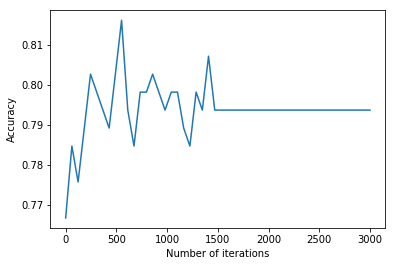

In [16]:
# Checking the convergence of the model
n_iter = np.linspace(1, 3000)
scores = np.array([])
for n in n_iter:
    model = linear_model.SGDClassifier(loss='log', max_iter=n, random_state=0)
    model.fit(X_train, y_train)
    scores = np.append(scores, model.score(X_test, y_test))
    
plt.plot(n_iter, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()


In [17]:
# Printing the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[116,  23],
       [ 23,  61]], dtype=int64)

In [18]:
# Printing the precision score for survived passengers
metrics.precision_score(y_test, y_pred)

0.7261904761904762

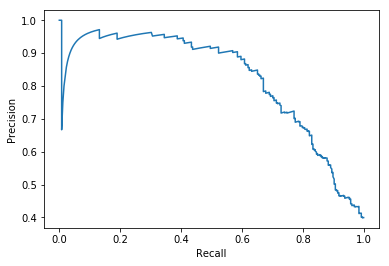

In [19]:
# Plotting the Precision-Recall curve
y_proba_train = model.predict_proba(X_train)[:, 1]
p, r, t = metrics.precision_recall_curve(y_train, y_proba_train)

plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [20]:
# Printing the last 5 combinations of precision-recall-threshold
prt = np.array(list(zip(p, r, t)))
prt_df = pd.DataFrame(data=prt, columns=['Precision', 'Recall', 'Threshold'])
prt_df.tail()

,Precision,Recall,Threshold
558,0.800000,0.015504,0.965561
559,0.750000,0.011628,0.969996
560,0.666667,0.007752,0.970968
561,1.000000,0.007752,0.973211
562,1.000000,0.003876,0.974678


In [21]:
# Counting the number of predicted survivors
y_proba_test = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba_test >= 0.973211).astype(int)
np.count_nonzero(y_pred)


0

In [22]:
# Printing the last 50 combinations of precision-recall-threshold
prt_df.tail(50)

,Precision,Recall,Threshold
513,0.960784,0.189922,0.903174
514,0.960000,0.186047,0.906782
515,0.959184,0.182171,0.909994
516,0.958333,0.178295,0.910013
517,0.957447,0.174419,0.912081
518,0.956522,0.170543,0.913555
519,0.955556,0.166667,0.914014
520,0.954545,0.162791,0.914128
521,0.953488,0.158915,0.915179
522,0.952381,0.155039,0.918781


In [23]:
# Counting the number of predicted survivors using the new threshold
y_proba_test = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba_test >= 0.932465).astype(int)
np.count_nonzero(y_pred)

13

In [24]:
# Pairs of target labels and predicted probabilities above the new threshold
yy = np.array(list(zip(y_test, y_proba_test)))
indices = np.where(yy[:,1] >= 0.932465)
yy[indices]

array([[1.        , 0.94751319],
       [1.        , 0.93842582],
       [1.        , 0.96626347],
       [1.        , 0.95822958],
       [1.        , 0.95844455],
       [1.        , 0.95454875],
       [1.        , 0.95465325],
       [1.        , 0.94716191],
       [1.        , 0.94935889],
       [1.        , 0.97058184],
       [1.        , 0.94185192],
       [1.        , 0.95991282],
       [1.        , 0.95343004]])